## Loan Delinquency Prediction 

### 1. Import libraries and Read the csv file

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

from lightgbm import LGBMClassifier
import lightgbm as lgb

import catboost as cb
from catboost import CatBoostClassifier

from xgboost import XGBClassifier
import xgboost as xgb

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import KFold
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from keras.wrappers.scikit_learn import KerasClassifier

from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from keras.callbacks import Callback
from sklearn.metrics import f1_score, precision_score

from sklearn.utils import resample

from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt
from scipy.stats import uniform as sp_uniform

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Dropout

from keras.optimizers import Adam
from keras.models import load_model
from keras.callbacks import ModelCheckpoint

from keras.optimizers import Adam
from keras.models import load_model
from keras.callbacks import ModelCheckpoint

import warnings; warnings.simplefilter('ignore')

from sklearn import preprocessing
import pandas_profiling

from imblearn.over_sampling import SMOTE
from sklearn.utils import class_weight
from imblearn.combine import SMOTETomek

C:\Users\panch\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import warnings; warnings.simplefilter('ignore')

In [3]:
dataframe = pd.read_csv("train.csv",header=0)

### 2. Generating dataset profile

In [4]:
# Generating dataset profile
pandas_profiling.ProfileReport(dataframe)

Number of variables,29
Number of observations,116058
Total Missing (%),0.0%
Total size in memory,25.7 MiB
Average record size in memory,232.0 B
Numeric,20
Categorical,5
Boolean,3
Date,0
Text (Unique),0
Rejected,1


1. There are 29 features and 116058 rows with 3 categorical and 2 boolean and2 datetime columns
2. The max loan term is only 1 year and data given is only for 3 months
3. and origination_date and first_payment date has distance of 1 to 3 months
4. There is NA values in dataset
5. Among 3 Source X,Y and Z , X has highest observations
6. No duplicated in loan_id values
7. Looks like m11,12 are very important in Month-wise loan performance column as the values are incremented when there is a delay in payment.

In [5]:
# Descriptive analysis
dataframe.describe(include='all')

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
count,1.160580e+05,116058,116058,116058.000000,1.160580e+05,116058.000000,116058,116058,116058.000000,116058.000000,...,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000
unique,NaN,3,19,NaN,NaN,NaN,3,4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,X,OTHER,NaN,NaN,NaN,2012-02-01,04/2012,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,63858,49699,NaN,NaN,NaN,52334,52840,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5.494155e+11,NaN,NaN,3.868961,2.082262e+05,292.280997,NaN,NaN,67.431939,1.593186,...,0.002180,0.003533,0.003421,0.004162,0.004825,0.005359,0.006617,0.007109,0.008065,0.005480
std,2.597560e+11,NaN,NaN,0.461020,1.146851e+05,89.762415,NaN,NaN,17.291719,0.491242,...,0.062161,0.082638,0.087553,0.100961,0.113128,0.128242,0.148430,0.162884,0.178128,0.073824
min,1.000009e+11,NaN,NaN,2.250000,1.100000e+04,60.000000,NaN,NaN,6.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.244656e+11,NaN,NaN,3.500000,1.200000e+05,180.000000,NaN,NaN,57.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.486239e+11,NaN,NaN,3.875000,1.830000e+05,360.000000,NaN,NaN,72.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.743034e+11,NaN,NaN,4.125000,2.780000e+05,360.000000,NaN,NaN,80.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


#### Class value counts

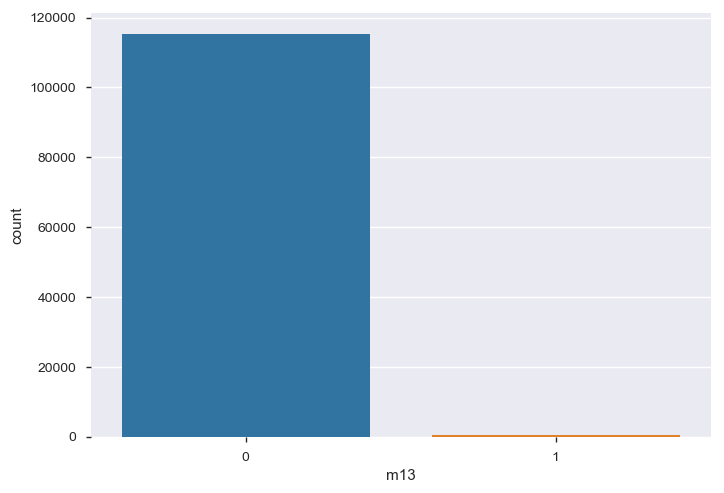

0    99.451998
1     0.548002
Name: m13, dtype: float64

In [6]:
dataframe['m13'].value_counts()
sns.countplot(x='m13',data=dataframe)
plt.show()
(dataframe["m13"].value_counts()/dataframe.shape[0]*100)

Dataset given is highly class imblanced and a binary classification problem

#### Check for delinquency counts according to loan origination date

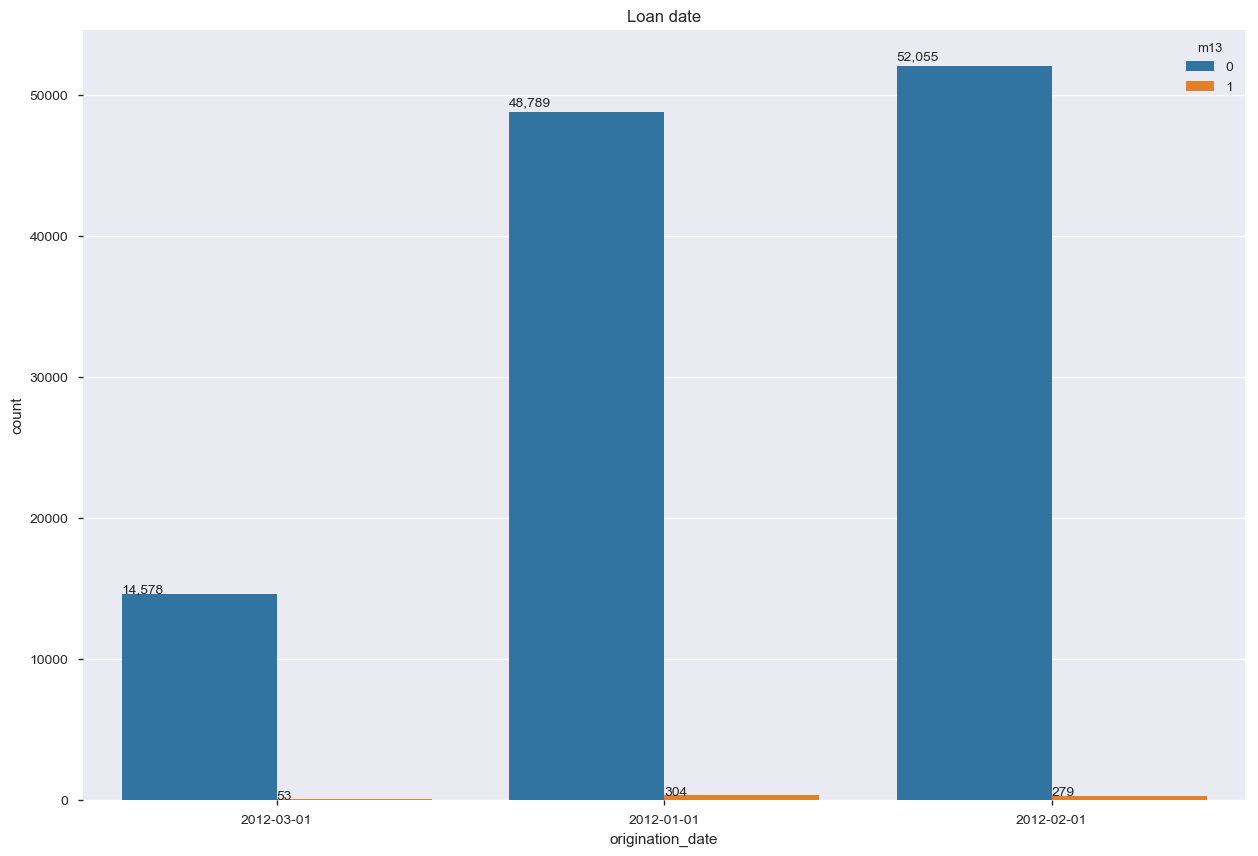

In [7]:
fig = plt.figure(figsize=(15,10))
ax = sns.countplot(x='origination_date', hue='m13', data=dataframe)
ax.set_title('Loan date')
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))
plt.show();

All years delinquency percentage is very low compared to Non-delinquent

#### Correlation matrix table

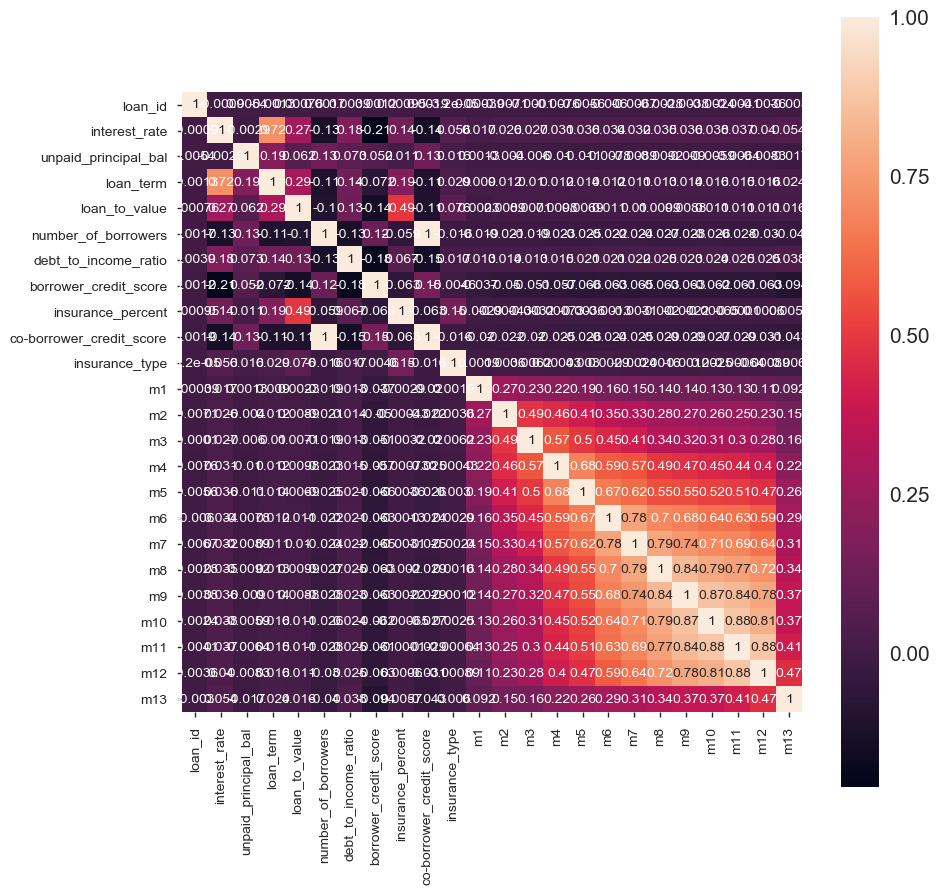

In [8]:
fig = plt.subplots(figsize = (10,10))
sns.set(font_scale=1.5)
sns.heatmap(dataframe.corr(),square = True,cbar=True,annot=True,annot_kws={'size': 10})
plt.show() 

The feature co-borrower_credit_score and number_of_borrowers are highly correlated and can consider to drop 

### 3. Fetaure extraction using delinqency columns

In [9]:
## Adding all the month wise loan performance columns given to create new column 'm24'
dataframe['m24'] =  dataframe['m4'] + dataframe['m5'] +dataframe['m6'] + \
    dataframe['m7'] +dataframe['m8'] +dataframe['m9'] + dataframe['m10'] +\
    dataframe['m11'] +dataframe['m12'] 

### 4. Dropping Un-necessary and highely correlated columns

In [10]:
drop_list = ['origination_date', 'first_payment_date',
                 'loan_id', 'co-borrower_credit_score', 'insurance_type', 'insurance_percent',
                 'financial_institution', 'loan_to_value', 'm3','m2', 'm1', 'debt_to_income_ratio']
dataframe=dataframe.drop(drop_list, axis=1)

### 4. Select categorical  and numerical features

In [11]:
df_cat = dataframe.select_dtypes(['object','category'])
df_num = dataframe.select_dtypes(exclude = ['object','category'])

dummy_list = df_cat.columns
for c in dummy_list:    
    df_cat[c] = pd.Categorical(df_cat[c])
    
dfC = pd.concat([df_num, df_cat], axis=1)
dfC.shape

(116058, 18)

#### 4.1 Dummyfy the categorical feature list

In [12]:
dfw1 = dfC.copy()
dfw1 = pd.get_dummies(dfw1, columns = dummy_list,  drop_first=True)

In [13]:
dfw1.head()

,interest_rate,unpaid_principal_bal,loan_term,number_of_borrowers,borrower_credit_score,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,m24,source_Y,source_Z,loan_purpose_B12,loan_purpose_C86
0,4.250,214000,360,1.0,694.0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,1
1,4.875,144000,360,1.0,697.0,0,0,0,0,0,0,0,1,0,1,1,1,0,1,0
2,3.250,366000,180,1.0,780.0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0
3,4.750,135000,360,2.0,633.0,0,0,0,0,0,1,1,1,1,1,4,0,0,1,0
4,4.750,124000,360,1.0,681.0,3,4,5,6,7,8,9,10,11,1,63,0,0,0,1


### 5. Split the Train and Validation dataset

In [14]:

yw1 = dfw1["m13"]
Xw1 = dfw1.drop('m13', axis=1)

Xw1_train, Xw1_val, yw1_train, yw1_val =train_test_split(Xw1, yw1, test_size=0.05, random_state=42)

### keeping complete data for training
Xw1_train = Xw1
yw1_train = yw1
      

In [15]:
print(Xw1_train.shape)
print(Xw1_val.shape)
print(yw1_train.shape)
print(yw1_val.shape)

(116058, 19)
(5803, 19)
(116058,)
(5803,)


### 6. Do SMOTE 

As it is class imbalance dataset,  tried UP-sampling , down sampling, and SMOTE but found good score with SMOTE

In [16]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 42)
Xw1_train, yw1_train = smote.fit_sample(Xw1_train, yw1_train)

### 7.  Build RF model

Tried Logistic Regression, RF , LSTM with different set of features along with tuning parametrs, finally could achieve good results with RF Calssifier mentioned below using only 19 features.

#### 7.1 Fit the model

In [17]:

model = RandomForestClassifier(criterion ='entropy', max_depth = 10, max_features ='auto',
                            n_estimators = 100, class_weight='balanced', n_jobs=-1, random_state=42 )


model.fit(Xw1_train, yw1_train)


RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=42, verbose=0, warm_start=False)

#### 7.2 Check score and important variables

In [18]:
    predictions_clf=model.predict(Xw1_val)
    print('Testing Accuarcy: ',accuracy_score(yw1_val, predictions_clf))
    print("Training Accuracy: ", model.score(Xw1_train, yw1_train))

    # making a classification report
    cr = classification_report(yw1_val , predictions_clf)
    print(cr)

    # making a confusion matrix
    cm1 = confusion_matrix(yw1_val, predictions_clf)
    print(cm1)

Testing Accuarcy:  0.9967258314664829
Training Accuracy:  0.988693663253106
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5772
           1       0.83      0.48      0.61        31

    accuracy                           1.00      5803
   macro avg       0.92      0.74      0.81      5803
weighted avg       1.00      1.00      1.00      5803

[[5769    3]
 [  16   15]]


#### 7.3 Check for Important variables

In [19]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(Xw1.shape[1]):
    print("%d. feature %d : %s : (%f)" % (f + 1, indices[f], Xw1.iloc[:,indices[f]].name, importances[indices[f]]))

1. feature 14 : m24 : (0.278875)
2. feature 13 : m12 : (0.163405)
3. feature 12 : m11 : (0.085605)
4. feature 3 : number_of_borrowers : (0.076296)
5. feature 11 : m10 : (0.062423)
6. feature 15 : source_Y : (0.047376)
7. feature 9 : m8 : (0.044001)
8. feature 4 : borrower_credit_score : (0.038247)
9. feature 10 : m9 : (0.034941)
10. feature 17 : loan_purpose_B12 : (0.032162)
11. feature 0 : interest_rate : (0.026567)
12. feature 18 : loan_purpose_C86 : (0.025947)
13. feature 8 : m7 : (0.021808)
14. feature 2 : loan_term : (0.015263)
15. feature 6 : m5 : (0.015248)
16. feature 16 : source_Z : (0.013513)
17. feature 1 : unpaid_principal_bal : (0.010331)
18. feature 7 : m6 : (0.005626)
19. feature 5 : m4 : (0.002367)


### Predict on Unseen Data

In [20]:
test_df = pd.read_csv("test.csv",na_values=["?",","])

In [21]:
test_df['m24'] =  test_df['m5'] +test_df['m6'] +test_df['m7'] +test_df['m8'] +test_df['m9'] + test_df['m10'] +test_df['m11'] +test_df['m12'] 

In [22]:
test_df=test_df.drop(drop_list, axis=1)

In [23]:
test_df_cat = test_df.select_dtypes(['object','category'])
test_df_num = test_df.select_dtypes(exclude = ['object','category'])

for c in dummy_list:    
    test_df_cat[c] = pd.Categorical(test_df_cat[c])

test_dfC = pd.concat([test_df_num, test_df_cat], axis=1)

test_dfw1 = test_dfC.copy()
test_dfw1 = pd.get_dummies(test_dfw1, columns = dummy_list,  drop_first=True)
test_dfw1.shape

(35866, 19)

In [24]:
test_pred = model.predict(test_dfw1)


In [25]:
sample_df = pd.read_csv("sample_submission.csv",na_values=["?",","])
sample_df.tail()

,loan_id,m13
35861,35862,0
35862,35863,0
35863,35864,0
35864,35865,0
35865,35866,0


In [26]:
sample_df.m13 = test_pred
sample_df.m13.value_counts()

0    35718
1      148
Name: m13, dtype: int64

sample_df.to_csv('rag13.csv', sep=',', index=False)